# PCA and K-Means Clustering

In [1]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
#!pip install kmodes
from kmodes.kprototypes import KPrototypes 

In [2]:
# import dataset
football = pd.read_csv('2022-2023 Football Player Stats.csv', delimiter = ';', encoding = 'latin_1')
football.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [3]:
# missing values
pd.isnull(football).sum()

Rk         0
Player     0
Nation     1
Pos        0
Squad      0
          ..
OG         0
Recov      0
AerWon     0
AerLost    0
AerWon%    0
Length: 124, dtype: int64

In [5]:
# display NA row
# parameter axis=1 for check at least one True in row
football[football.isna().any(axis=1)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1875,1876,David Ozoh,NaN,FW,Crystal Palace,Premier League,17,2005,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# remove specific variables
football_df = football.drop(['Rk', 'Player', 'Nation', 'Squad', 'Comp'], axis=1)

In [8]:
football_df.head()

,Pos,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,MFFW,22,2000,20,19,1596,17.7,1,1.53,0.28,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,DF,35,1987,22,22,1980,22.0,0,0.86,0.05,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,MFFW,23,1999,14,8,770,8.6,0,1.05,0.35,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,MF,22,2000,20,20,1799,20.0,1,0.60,0.15,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,MF,30,1993,15,15,1165,12.9,0,0.31,0.00,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [9]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 119 entries, Pos to AerWon%
dtypes: float64(112), int64(6), object(1)
memory usage: 2.4+ MB


In [10]:
football_df['Pos'].unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'GK', 'DFMF',
       'FWDF'], dtype=object)

In [11]:
football_df.mean()

C:\Users\User\AppData\Local\Temp\ipykernel_6524\3846499744.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  football_df.mean()


Age          26.011157
Born       1996.155820
MP           11.833023
Starts        8.476013
Min         760.451097
              ...     
OG            0.003142
Recov         4.951967
AerWon        1.312064
AerLost       1.497356
AerWon%      43.583600
Length: 118, dtype: float64

In [12]:
football_df.var()

C:\Users\User\AppData\Local\Temp\ipykernel_6524\912617741.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  football_df.var()


Age            19.769221
Born           19.803464
MP             47.118314
Starts         48.921392
Min        349392.424040
               ...      
OG              0.000511
Recov           8.420637
AerWon          2.494943
AerLost         3.350331
AerWon%       711.453819
Length: 118, dtype: float64

In [13]:
# Remove columns with names containing the '%' symbol
# to avoid multicollinearity in which k-means is very sensitive to it
football_df = football_df.drop(football_df.filter(like='%').columns, axis=1)
football_df.head()

,Pos,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost
0,MFFW,22,2000,20,19,1596,17.7,1,1.53,0.28,...,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19
1,DF,35,1987,22,22,1980,22.0,0,0.86,0.05,...,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23
2,MFFW,23,1999,14,8,770,8.6,0,1.05,0.35,...,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05
3,MF,22,2000,20,20,1799,20.0,1,0.60,0.15,...,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50
4,MF,30,1993,15,15,1165,12.9,0,0.31,0.00,...,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39


In [14]:
football_df.columns

Index(['Pos', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Goals', 'Shots',
       'SoT',
       ...
       'Fld', 'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon',
       'AerLost'],
      dtype='object', length=110)

In [15]:
# final dataframe
# to find the position cluster based on selected factors
football_norm = football_df.copy()
pos = football_norm.pop('Pos')
football_norm.head()

,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,G/Sh,...,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost
0,22,2000,20,19,1596,17.7,1,1.53,0.28,0.04,...,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19
1,35,1987,22,22,1980,22.0,0,0.86,0.05,0.00,...,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23
2,23,1999,14,8,770,8.6,0,1.05,0.35,0.00,...,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05
3,22,2000,20,20,1799,20.0,1,0.60,0.15,0.08,...,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50
4,30,1993,15,15,1165,12.9,0,0.31,0.00,0.00,...,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39


In [16]:
football_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 109 entries, Age to AerLost
dtypes: float64(103), int64(6)
memory usage: 2.2 MB


## PCA

In [17]:
# scaling
from sklearn.preprocessing import scale
football_norm = pd.DataFrame(scale(football_norm), index = football_norm.index, columns = football_norm.columns)
football_norm.head()

,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,G/Sh,...,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost
0,-0.90231,0.864000,1.190001,1.504914,1.413826,1.408645,-0.013669,0.199539,-0.173953,-0.203778,...,0.882198,-0.062826,0.378839,-0.388893,-0.211291,-0.196073,-0.139030,-0.031699,-0.615524,-0.167949
1,2.02204,-2.057820,1.481418,1.933909,2.063589,2.063508,-0.510356,-0.270850,-0.478760,-0.540467,...,-0.512821,-0.280109,-0.639030,0.485081,-0.211291,-0.196073,-0.139030,0.581821,0.549589,-0.146092
2,-0.67736,0.639245,0.315748,-0.068069,0.016158,0.022773,-0.510356,-0.137456,-0.081186,-0.540467,...,0.105426,-0.370644,-0.263799,0.331326,-0.211291,-0.196073,-0.139030,1.098831,-0.241928,-0.244450
3,-0.90231,0.864000,1.190001,1.647912,1.757321,1.758921,-0.013669,-0.453389,-0.346235,0.132910,...,0.160910,-0.370644,-0.565709,-0.154215,-0.211291,-0.196073,2.073108,0.568034,-0.514210,-0.544988
4,0.89729,-0.709288,0.461456,0.932920,0.684534,0.677636,-0.510356,-0.656990,-0.545022,-0.540467,...,-0.108583,-0.370644,-0.617465,0.833052,-0.211291,-0.196073,-0.139030,0.537013,-0.634521,-0.605096


In [18]:
football_norm.mean()

Age       -8.521756e-17
Born      -1.947605e-14
MP        -1.511125e-16
Starts    -8.265774e-17
Min        5.701815e-17
               ...     
PKcon     -2.005751e-16
OG        -1.083799e-17
Recov      3.421450e-17
AerWon    -1.802203e-17
AerLost   -8.309125e-17
Length: 109, dtype: float64

In [19]:
football_norm.var()

Age        1.000372
Born       1.000372
MP         1.000372
Starts     1.000372
Min        1.000372
             ...   
PKcon      1.000372
OG         1.000372
Recov      1.000372
AerWon     1.000372
AerLost    1.000372
Length: 109, dtype: float64

- mean = 0
- variance = 1
- normalised

In [44]:
football_norm.shape

(2689, 109)

In [20]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 1)

In [21]:
pca.fit(football_norm)

PCA(random_state=1, svd_solver='randomized')

In [22]:
# PCA components 
pca.components_

array([[ 1.37767178e-02, -1.36925666e-02,  1.92931747e-02, ...,
         1.23406111e-01, -5.45021166e-04, -3.81452883e-02],
       [-7.10129913e-02,  7.06544260e-02, -2.66920797e-02, ...,
         4.09234030e-02, -1.52428933e-02,  5.61408002e-02],
       [-1.12008347e-01,  1.12186333e-01, -1.60906895e-01, ...,
         1.11531033e-01,  6.64637893e-02,  9.29683963e-02],
       ...,
       [ 0.00000000e+00,  3.71047865e-16, -4.53894536e-18, ...,
        -6.93889390e-18, -2.77555756e-17, -7.63278329e-17],
       [-0.00000000e+00, -1.65422146e-16, -2.49521969e-16, ...,
         5.55111512e-17,  2.22044605e-16, -2.49800181e-16],
       [ 0.00000000e+00, -2.63979512e-16, -1.62374845e-16, ...,
         1.32706346e-16,  8.67361738e-17, -2.21177243e-16]])

In [23]:
# Variance Ratio
pca.explained_variance_ratio_

array([1.64168767e-01, 1.16945287e-01, 6.41638408e-02, 4.36212346e-02,
       3.98337103e-02, 2.60553437e-02, 2.53564289e-02, 2.29063511e-02,
       1.89020284e-02, 1.81954762e-02, 1.81016710e-02, 1.75839591e-02,
       1.64219809e-02, 1.63062079e-02, 1.56469128e-02, 1.44708278e-02,
       1.41376874e-02, 1.39167448e-02, 1.28726321e-02, 1.23057841e-02,
       1.13097499e-02, 1.11551130e-02, 1.02296043e-02, 9.98816506e-03,
       9.65199992e-03, 9.55208723e-03, 9.24327137e-03, 9.06020038e-03,
       8.95166201e-03, 8.65322151e-03, 8.51669334e-03, 8.34425863e-03,
       8.18832511e-03, 7.97716716e-03, 7.80331302e-03, 7.59688547e-03,
       7.34705146e-03, 7.25316862e-03, 7.10162880e-03, 6.76335220e-03,
       6.68656684e-03, 6.51631049e-03, 6.12781066e-03, 6.00446841e-03,
       5.89315569e-03, 5.69558870e-03, 5.53550853e-03, 5.23295930e-03,
       4.80194888e-03, 4.75730438e-03, 4.53036218e-03, 4.31248683e-03,
       4.06471892e-03, 4.01284866e-03, 3.90621350e-03, 3.74294713e-03,
      

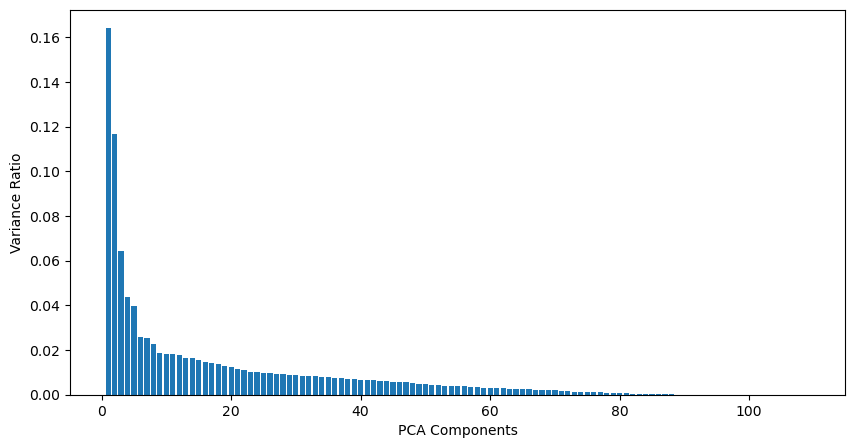

In [24]:
# Variance Ratio bar plot for each PCA components
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components")
plt.ylabel("Variance Ratio")

plt.show()

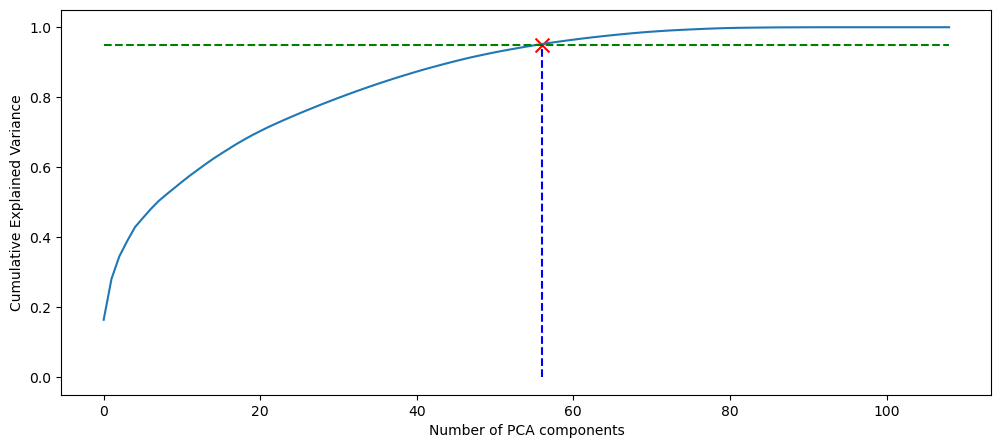

Number of components explaining 95% of variance: 57


In [25]:
fig = plt.figure(figsize=(12, 5))
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance_ratio_cumulative)
plt.hlines(y=0.95, xmax=len(explained_variance_ratio_cumulative) - 1, xmin=0, colors="g", linestyles="--")

# Find the number of components when cumulative explained variance >= 0.95
n_components_95 = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1

# Marking
plt.scatter(n_components_95 - 1, 0.95, color='r', marker='x', s=100)

plt.vlines(x=n_components_95 - 1, ymax=0.95, ymin=0, colors="b", linestyles="--")

plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print("Number of components explaining 95% of variance:", n_components_95)

In [26]:
# Checking which attributes are well explained by the pca components
pca_loadings = pd.DataFrame(pca.fit(football_norm).components_.T[:, :57], index=football_norm.columns, columns=[f"PC{i+1}" for i in range(57)])

In [27]:
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
Age,0.013777,-0.071013,-0.112008,0.039139,0.096859,0.093087,-0.048326,0.102949,0.135021,-0.193549,...,0.008973,0.009241,-0.023848,-0.010472,0.027487,0.028117,-0.014430,-0.025604,0.002246,-0.014356
Born,-0.013693,0.070654,0.112186,-0.038580,-0.097503,-0.092686,0.046732,-0.103710,-0.135836,0.193802,...,-0.010596,-0.009872,0.025945,0.013092,-0.029050,-0.027237,0.015010,0.026874,0.001685,0.013159
MP,0.019293,-0.026692,-0.160907,-0.030590,0.357012,-0.132323,0.010304,-0.099546,-0.044424,0.026960,...,-0.041502,-0.033985,0.071223,-0.006485,-0.053643,0.010137,0.006984,0.001048,0.034998,-0.003157
Starts,0.027471,-0.073902,-0.168560,-0.012528,0.343507,-0.154088,0.047834,-0.084390,-0.055104,0.042135,...,0.029997,0.031670,-0.019337,-0.001814,0.012935,0.048464,0.008233,-0.015971,-0.018051,-0.010477
Min,0.028742,-0.075836,-0.170129,-0.013282,0.344471,-0.157931,0.050030,-0.082865,-0.050952,0.043694,...,0.021291,0.022610,-0.009016,-0.000451,-0.002236,0.044533,0.007057,-0.010993,-0.007922,-0.004693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PKcon,0.009815,-0.021113,0.013620,0.022142,-0.012931,-0.012587,-0.005344,-0.005503,0.054104,0.072087,...,-0.037605,-0.021082,-0.068592,0.085861,-0.003175,0.030429,0.063263,0.110931,-0.047953,0.007146
OG,0.013799,-0.031133,0.007841,-0.007927,0.013791,0.010582,0.015330,-0.015992,0.013795,0.047630,...,-0.031493,-0.003250,0.041444,-0.008799,0.003733,-0.020305,0.021035,0.013379,0.042170,-0.005444
Recov,0.123406,0.040923,0.111531,-0.016011,0.056283,-0.012491,0.003987,-0.033505,-0.090404,0.045568,...,-0.083531,-0.023268,0.149831,0.011014,0.183789,0.324569,0.258059,0.208711,-0.184934,-0.148832
AerWon,-0.000545,-0.015243,0.066464,-0.108128,0.024734,0.140265,-0.081953,0.156685,0.169037,0.152743,...,-0.041583,-0.173079,0.109455,-0.102478,0.133335,-0.413687,0.139604,0.083429,-0.179249,-0.184133


In [28]:
football_plot = pd.DataFrame(pca.fit_transform(football_norm), columns=[f"PC{i+1}" for i in range(109)], index=football_norm.index)

In [29]:
football_plot.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109
0,-2.149984,2.587061,-1.467098,1.128585,2.060970,-0.799927,-0.282402,-1.182138,-2.275689,0.520383,...,-0.006584,-0.003657,0.000709,-0.001972,-0.000059,-0.000011,1.621196e-14,-3.758023e-15,2.655432e-15,-2.304302e-15
1,2.268065,-3.937485,0.220326,-0.163475,3.387900,-0.442071,0.904620,0.427710,-0.893169,-0.095576,...,-0.006850,0.002317,0.002993,0.001150,-0.003482,0.000033,3.201783e-14,5.395505e-16,2.239947e-15,7.624100e-15
2,2.895424,1.793963,1.604410,-0.736388,-0.175302,-1.150039,0.473270,-1.188666,-1.449082,-0.710897,...,0.006839,-0.002204,0.000778,-0.004825,0.001203,0.000012,-7.804036e-16,1.437736e-15,6.711915e-15,1.628481e-15
3,5.290889,-1.140538,-0.572533,-2.958425,1.797073,-0.967323,-1.075419,-1.743661,-1.636519,-0.136113,...,-0.000058,-0.000141,-0.000319,-0.000319,0.002189,-0.000074,4.757412e-14,8.841509e-15,-6.399003e-16,2.225730e-15
4,1.385338,-1.647840,2.273706,0.168962,2.356120,0.520391,0.473573,-1.178610,-1.422466,-1.275537,...,-0.000827,0.006666,-0.001815,-0.000182,-0.002524,0.000004,3.210592e-14,-1.663301e-15,-1.137949e-15,-4.546089e-15


In [30]:
# Building the dataframe using Incremental PCA for better efficiency
from sklearn.decomposition import IncrementalPCA

inc_pca = IncrementalPCA(n_components=57)

In [31]:
# Fitting the scaled df on incremental pca
df_inc_pca = inc_pca.fit_transform(football_norm)
df_inc_pca

array([[-2.14995859,  2.58690285, -1.46706892, ...,  0.32649496,
        -0.44895692,  0.3574537 ],
       [ 2.26804321, -3.93765929,  0.22067569, ..., -0.4777166 ,
         0.75474619,  0.14702531],
       [ 2.89541759,  1.79411069,  1.60469544, ..., -0.01770053,
         0.03499011,  0.25914672],
       ...,
       [ 1.33622963,  3.16356623, -4.12831531, ...,  0.71374549,
         1.01047843,  0.11400566],
       [-3.58612337,  0.16164566, -0.54145277, ...,  0.00577727,
         2.07689137,  1.00719716],
       [-1.95663344,  1.57265509, -1.26279602, ..., -0.18809271,
        -0.5170989 ,  0.5129155 ]])

In [32]:
# Creating new dataframe with Principal components
df_pca = pd.DataFrame(df_inc_pca, columns=[f"PC{i+1}" for i in range(57)])
df_pca_final = pd.concat([pos, df_pca], axis=1)
df_pca_final.head()

,Pos,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
0,MFFW,-2.149959,2.586903,-1.467069,1.129417,2.062276,-0.795142,-0.306545,-1.183281,-2.282475,...,-0.275342,0.246783,0.305877,0.265154,-0.185859,0.148551,0.308123,0.326495,-0.448957,0.357454
1,DF,2.268043,-3.937659,0.220676,-0.162119,3.388770,-0.468249,0.887048,0.428904,-0.902156,...,-0.044806,0.277981,-0.411853,-0.342443,0.266466,-0.371486,1.130115,-0.477717,0.754746,0.147025
2,MFFW,2.895418,1.794111,1.604695,-0.736908,-0.175312,-1.169101,0.442166,-1.180028,-1.462107,...,0.186745,-0.441028,-0.196248,-0.010306,0.013304,-0.268014,-0.336665,-0.017701,0.034990,0.259147
3,MF,5.290869,-1.140380,-0.572344,-2.960160,1.796364,-0.950306,-1.103051,-1.739249,-1.642965,...,0.058598,-0.715248,0.083709,-0.097863,0.229873,0.060237,0.160562,-0.185053,0.182833,0.045239
4,MF,1.385257,-1.647994,2.274013,0.167379,2.356973,0.500282,0.483964,-1.183783,-1.425894,...,-0.006333,0.203620,-0.021219,0.156657,0.291887,-0.204624,-0.016329,-0.305648,-0.363900,-0.122475


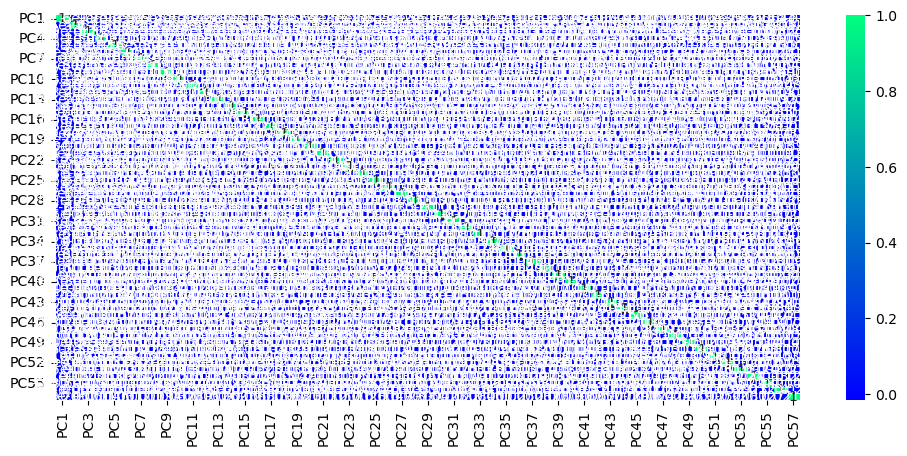

In [33]:
# Plotting Heatmap to check is there still dependency in the dataset
import seaborn as sns

plt.figure(figsize=(12, 5))      
ax = sns.heatmap(df_pca_final.corr(),annot = True,cmap='winter')

## K-means clustering

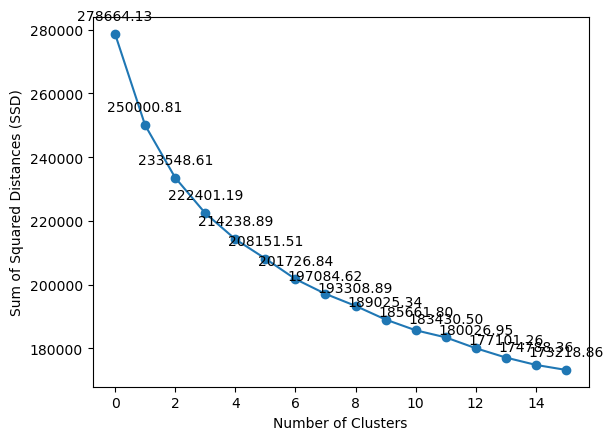

In [35]:
# Elbow curve method to find the ideal number of clusters
from sklearn.cluster import KMeans

df_pca_final_data = df_pca_final.drop(['Pos'], axis=1)

ssd = []
for num_clusters in list(range(1, 17)):
    model_clus = KMeans(n_clusters=num_clusters, max_iter=150, random_state=1)
    model_clus.fit(df_pca_final_data)
    ssd.append(model_clus.inertia_)

# Plot the elbow curve with only the SSD values on the y-axis
plt.plot(ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')

# Add annotations for each data point (SSD value)
for i, ssd_value in enumerate(ssd):
    plt.annotate(f'{ssd_value:.2f}', (i, ssd_value), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [36]:
#K-means with k=6 clusters

cluster6 = KMeans(n_clusters = 6, max_iter = 150, random_state= 1)
cluster6.fit(df_pca_final_data)

KMeans(max_iter=150, n_clusters=6, random_state=1)

In [37]:
cluster6.labels_

array([2, 0, 2, ..., 2, 3, 2])

In [38]:
# Assign the label

df_pca_final['Cluster_Label'] = cluster6.labels_
df_pca_final.head()

,Pos,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,Cluster_Label
0,MFFW,-2.149959,2.586903,-1.467069,1.129417,2.062276,-0.795142,-0.306545,-1.183281,-2.282475,...,0.246783,0.305877,0.265154,-0.185859,0.148551,0.308123,0.326495,-0.448957,0.357454,2
1,DF,2.268043,-3.937659,0.220676,-0.162119,3.388770,-0.468249,0.887048,0.428904,-0.902156,...,0.277981,-0.411853,-0.342443,0.266466,-0.371486,1.130115,-0.477717,0.754746,0.147025,0
2,MFFW,2.895418,1.794111,1.604695,-0.736908,-0.175312,-1.169101,0.442166,-1.180028,-1.462107,...,-0.441028,-0.196248,-0.010306,0.013304,-0.268014,-0.336665,-0.017701,0.034990,0.259147,2
3,MF,5.290869,-1.140380,-0.572344,-2.960160,1.796364,-0.950306,-1.103051,-1.739249,-1.642965,...,-0.715248,0.083709,-0.097863,0.229873,0.060237,0.160562,-0.185053,0.182833,0.045239,4
4,MF,1.385257,-1.647994,2.274013,0.167379,2.356973,0.500282,0.483964,-1.183783,-1.425894,...,0.203620,-0.021219,0.156657,0.291887,-0.204624,-0.016329,-0.305648,-0.363900,-0.122475,0


In [39]:
# Number of players in each cluster

df_pca_final['Cluster_Label'].value_counts()

0    902
3    558
2    553
4    306
5    206
1    164
Name: Cluster_Label, dtype: int64

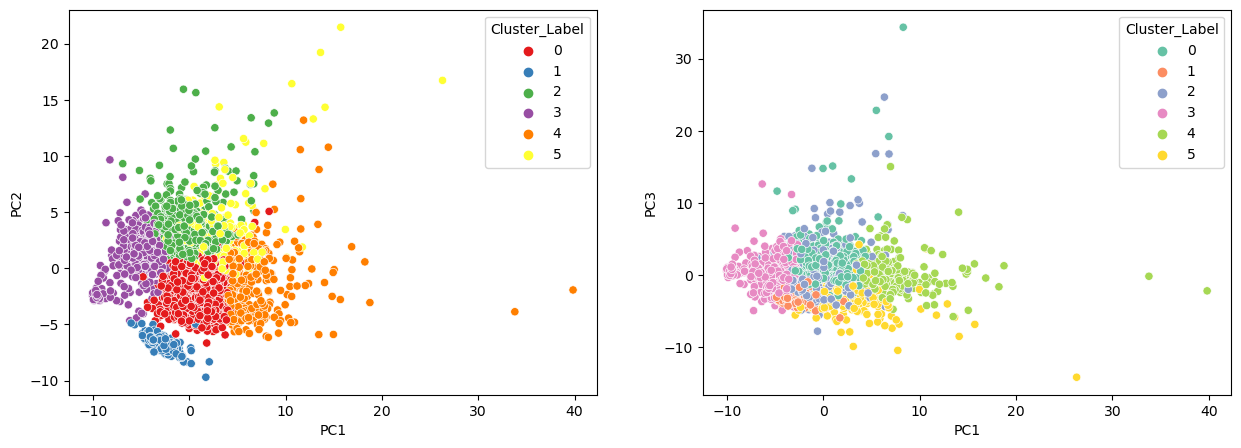

In [40]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x='PC1',y='PC2', hue='Cluster_Label', legend='full', palette="Set1", data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC1',y='PC3', hue='Cluster_Label', legend='full', palette="Set2", data=df_pca_final,ax=axes[1])
plt.show()

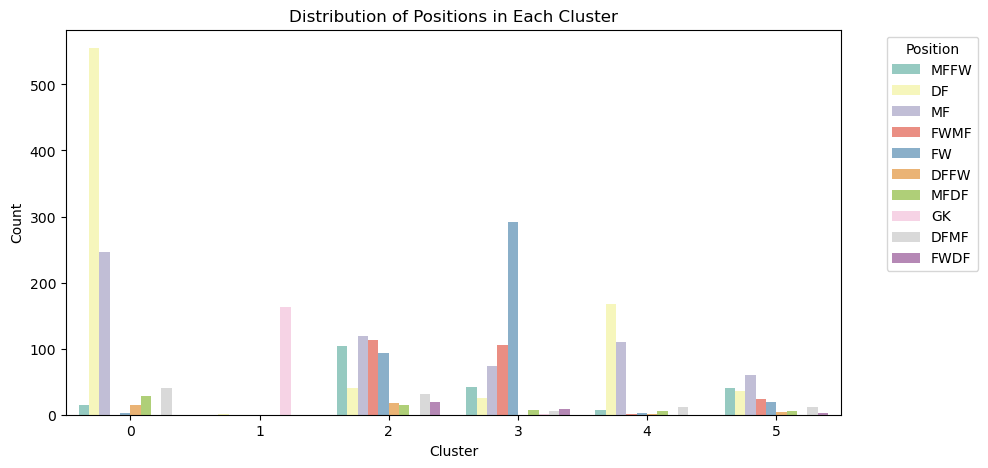

In [41]:
# Create a bar plot to visualize the distribution of positions in each cluster
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster_Label', hue='Pos', data=df_pca_final, palette='Set3')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Positions in Each Cluster')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()